This notebook contains the tools to clip K2 lightcurves for EBs found int the <a href = "http://keplerebs.villanova.edu/"> Kepler EB Catalog </a>. <br> It also allows one to run ketu on them. <br> Of more general importance is the plotting utilities at the bottom. 

In [1]:
from __future__ import division, print_function

%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["font.size"] = 20
import h5py
import transit
import numpy as np
import matplotlib.pyplot as pl
from matplotlib.ticker import MaxNLocator
import ketu
import urllib2
import sys
from astropy.io import fits
from astropy.io import ascii
#from eliminate_eclipse import *
import pipeline
from eliminate_eclipses import *

In [2]:
r = ascii.read("/k2_data/c0_EB")

In [3]:
r

KIC/EPIC,Campaign,period,period error,bjd0,pdepth,sdepth,pwidth,swidth,sep
int32,string40,float64,float64,float64,float64,float64,float64,float64,float64
202073348,K2C0,0.320736,4.79e-05,56775.965715,0.1928,0.2139,0.0948,0.1167,0.4945
202073397,K2C0,0.3455274,5.37e-05,56774.532584,0.1722,0.1658,0.2358,0.2405,0.4929
202073489,K2C0,0.3487252,5.45e-05,56774.558866,0.2449,0.2253,0.1584,0.0821,0.5086
202071279,K2C0,0.3506658,5.45e-05,54999.63917,0.1152,0.1014,0.157,0.1593,0.4973
202073361,K2C0,0.3618331,5.71e-05,56774.408956,0.4243,0.3879,0.1539,0.1545,0.4984
202073353,K2C0,0.3712502,5.89e-05,56774.704279,0.025,0.0201,0.1297,0.0687,0.5183
202083924,K2C0,0.3783797,6.08e-05,56774.36317,0.1936,0.149,0.1141,0.1034,0.5004
202073346,K2C0,0.3842434,6.18e-05,56774.457318,0.1094,0.1223,0.1431,0.1205,0.4987
202073319,K2C0,0.4620707,8.11e-05,56774.506115,0.112,0.0619,0.1328,0.1405,0.5084


First we want to clip all of the lightcurves of their EB eclipses and then save these new curves into fits files for analysis with ketu

In [4]:
def run(): #this code will clip all of the above EBs
    for i in range(len(r)):
        ID = str(r['KIC/EPIC'][i])
        t, f = retrieve(ID, 0)
        period = r['period'][i]
        p_width, s_width = r['pwidth'][i], r['swidth'][i]
        p_phase, s_phase = 0, r['sep'][i]
        dit(mask, ID, 0)
        #FOR CAMPAIGN 0 (this data) be sure to remove all data before JD = 2456773phase = find_phase(t, period, r['bjd0'][i]+2400000)
        mask = clip_eclipses(phase, period, r['sep'][i],p_width, s_width) * (t>2456773)
        e

In [12]:
run()

The code below runs ketu on the EB included and EB clipped lightcurves for comparison

In [6]:
for epicid in r['KIC/EPIC']:
    pipeline.analyze(pipeline.getQuery(str(epicid),"0"))
    pipeline.analyze(pipeline.getEBQuery(str(epicid),"0"))

Using cached value in Likelihood
Querying OneDSearch
Finished querying OneDSearch in 57.45s
Querying IterativeTwoDSearch
Finished querying IterativeTwoDSearch in 246.27s
Using cached value in Likelihood
Querying OneDSearch
Finished querying OneDSearch in 73.00s
Querying IterativeTwoDSearch
Finished querying IterativeTwoDSearch in 248.23s
Using cached value in Likelihood
Querying OneDSearch
Finished querying OneDSearch in 59.07s
Querying IterativeTwoDSearch
Finished querying IterativeTwoDSearch in 244.37s
Using cached value in Likelihood
Querying OneDSearch
Finished querying OneDSearch in 29.24s
Querying IterativeTwoDSearch
Finished querying IterativeTwoDSearch in 242.74s
Using cached value in Likelihood
Querying OneDSearch
Finished querying OneDSearch in 58.78s
Querying IterativeTwoDSearch
Finished querying IterativeTwoDSearch in 243.63s
Using cached value in Likelihood
Querying OneDSearch
Finished querying OneDSearch in 70.16s
Querying IterativeTwoDSearch
Finished querying IterativeTw

Because there is concern about the quality of the clipping and how it affects the resulting ketu detections, you can explore the clipping below in an interative fashion. Yellow points are data points that are kept after the clipping while black are what was removed. 

In [34]:
r = pipeline.analyze(pipeline.getQuery(str(r['KIC/EPIC'][0]),"0"))

Using cached value in IterativeTwoDSearch


In [37]:
r.response['peaks']

[{'depth': 99.67287300063208,
  'depth_ivar': 0.0061636163774900742,
  'duration': 0.050000000000000003,
  'period': 4.7816818338620992,
  's2n': 7.8251879396028707,
  't0': 4.5868089490931867}]

In [29]:
i=0

202073117


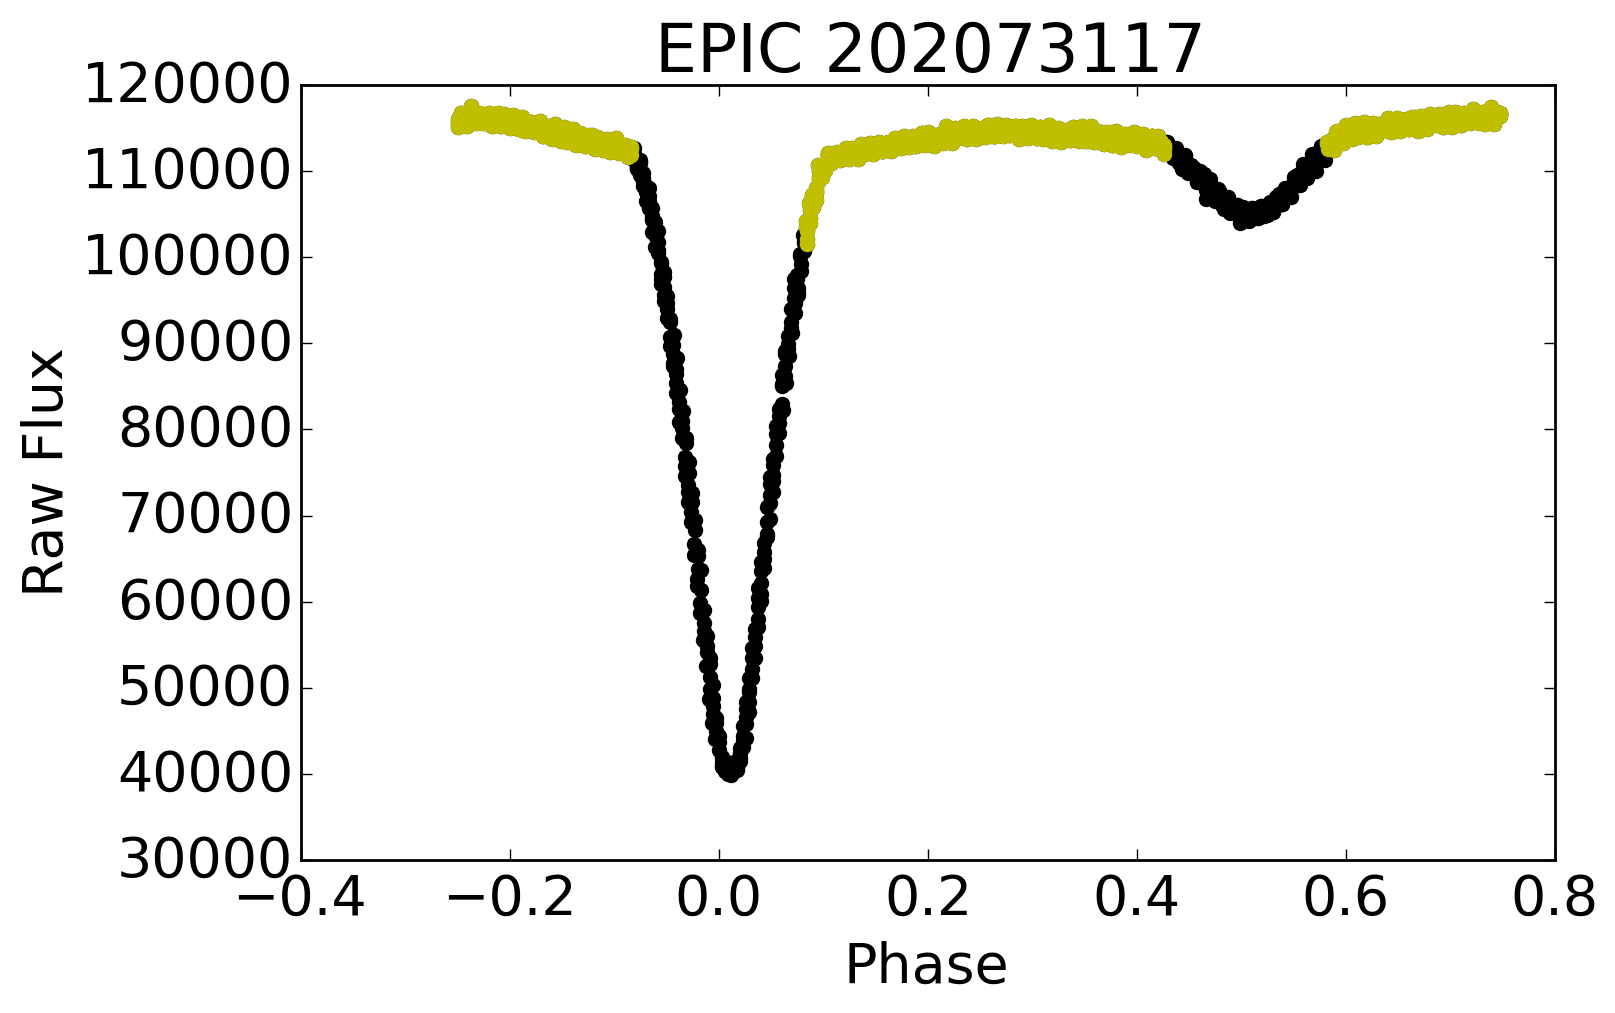

In [31]:
print(str(r['KIC/EPIC'][i]))
tu, fu = pipeline.retrieve(str(r['KIC/EPIC'][i]),"0")
tc, fc = pipeline.retrieve(str(r['KIC/EPIC'][i]),"0","/k2_data/eb_removed/")
fig = pl.figure(figsize=(5 * 1.61803398875,5))
pl.title("EPIC " + str(r['KIC/EPIC'][i]))
tu, fu = tu[tu > 2456773], fu[tu>2456773]
tc, fc = tc[tc > 2456773], fc[tc>2456773]
p,cen = r['period'][i],r['bjd0'][i]
pu,pc = find_phase(tu,p,cen+2400000),find_phase(tc,p,cen+2400000) 
pl.plot((pu + 0.25) % 1 - 0.25,fu[:,8],'k.',ms=10)
pl.plot((pc + 0.25) % 1 - 0.25,fc[:,8],'y.',ms=10)
pl.xlabel("Phase")
pl.ylabel("Raw Flux")
i+=1

In [338]:
edit(m, str(r['KIC/EPIC'][i]), 0, outpath="/k2_data/")